# Exercise 2

This notebook serves as a comprehensive solution to Exercise 2 of the VU Machine Learning course (Summer Semester 2025). The primary objective of this exercise is to deepen our understanding of Neural Networks (NNs) by implementing them using various approaches and conducting a thorough comparative analysis. All approaches are applied to the [Polish Bankruptcies Dataset](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) as well as the [Second Dataset]().

Throughout this notebook, for each of the above mentioned datasets, we will:

- Implement a Neural Network framework from scratch: The architecture, backward and forward propagation and the entire network are built within the **nn** folder in this repo.

- Implement the same Neural Network using PyTorch: We leverage PyTorch's standard functions to create an equivalent NN, showcasing a more conventional approach to NN development.

- Utilize an LLM tool for NN implementation: Using ChatGPT 4o to generate another version of the NN from scratch, allowing for a direct comparison of code structure, design choices, and potential differences with our custom implementation.

- Investigate and experiment with NN configurations: We explore various hyperparameters, including different activation functions, numbers of layers, and nodes per layer, using a grid search approach to find optimal values.

- Analyze performance and resource usage: We calculate the total number of learnable parameters and the virtual RAM consumed by our instantiated NNs.

- Conduct a detailed comparison: The core of this notebook involves comparing the performance, efficiency, and implementation details across our custom-built NN, the PyTorch version, and the LLM-generated code. We discuss findings related to classification performance metrics and the insights gained from each implementation method.

### Setup and Imports

In [1]:
import pandas as pd
import numpy as np

from nn_from_scratch.nn import NN
from nn_from_scratch.layer import Layer
from nn_from_scratch.functions import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/pappalardodaniel/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instan

## MNIST Dataset (How to use the custom NN)

In [ ]:
mnist = pd.read_csv("train.csv")
split = int(len(mnist)*0.8)

y_train, y_test = mnist["label"].values[:split].astype(int), mnist["label"].values[split:].astype(int)
X_train, X_test = mnist.drop("label", axis=1).values[:split] / 255.0, mnist.drop("label", axis=1).values[split:] / 255.0

y_train_encoded = one_hot_encoding(y_train, 10)
y_test_encoded = one_hot_encoding(y_test, 10)

  5%|▌         | 1/20 [00:03<01:09,  3.65s/it]

Epoch 1/20 ============ Loss: 2.302


 10%|█         | 2/20 [00:06<00:56,  3.14s/it]

Epoch 2/20 ============ Loss: 2.301


 15%|█▌        | 3/20 [00:09<00:49,  2.89s/it]

Epoch 3/20 ============ Loss: 2.300


 20%|██        | 4/20 [00:11<00:45,  2.82s/it]

Epoch 4/20 ============ Loss: 2.297


 25%|██▌       | 5/20 [00:14<00:42,  2.82s/it]

Epoch 5/20 ============ Loss: 2.285


 30%|███       | 6/20 [00:17<00:41,  2.98s/it]

Epoch 6/20 ============ Loss: 2.170


 35%|███▌      | 7/20 [00:20<00:38,  2.94s/it]

Epoch 7/20 ============ Loss: 1.673


 40%|████      | 8/20 [00:24<00:37,  3.16s/it]

Epoch 8/20 ============ Loss: 1.022


 45%|████▌     | 9/20 [00:28<00:36,  3.33s/it]

Epoch 9/20 ============ Loss: 0.761


 50%|█████     | 10/20 [00:33<00:39,  3.96s/it]

Epoch 10/20 ============ Loss: 0.671


 55%|█████▌    | 11/20 [00:35<00:31,  3.49s/it]

Epoch 11/20 ============ Loss: 0.623


 60%|██████    | 12/20 [00:38<00:26,  3.28s/it]

Epoch 12/20 ============ Loss: 0.586


 65%|██████▌   | 13/20 [00:41<00:22,  3.17s/it]

Epoch 13/20 ============ Loss: 0.551


 70%|███████   | 14/20 [00:44<00:18,  3.04s/it]

Epoch 14/20 ============ Loss: 0.512


 75%|███████▌  | 15/20 [00:47<00:15,  3.04s/it]

Epoch 15/20 ============ Loss: 0.472


 80%|████████  | 16/20 [00:49<00:11,  2.89s/it]

Epoch 16/20 ============ Loss: 0.439


 85%|████████▌ | 17/20 [00:54<00:09,  3.27s/it]

Epoch 17/20 ============ Loss: 0.414


 90%|█████████ | 18/20 [00:56<00:06,  3.12s/it]

Epoch 18/20 ============ Loss: 0.392


 95%|█████████▌| 19/20 [01:00<00:03,  3.28s/it]

Epoch 19/20 ============ Loss: 0.374


100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

Epoch 20/20 ============ Loss: 0.357


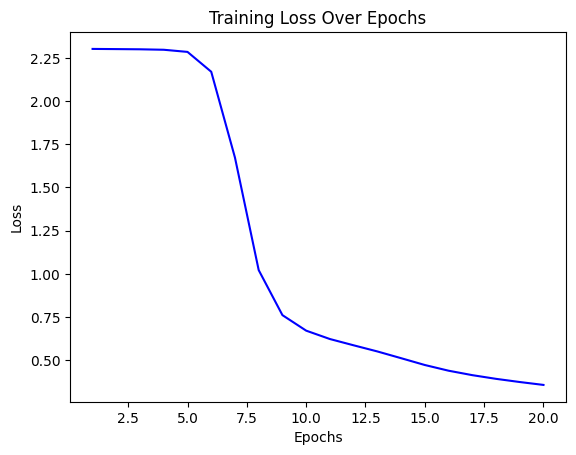

In [ ]:
layers = [
    Layer(input_size=X_train.shape[1], output_size=128, activation_function='relu'),
    Layer(input_size=128, output_size=64, activation_function='relu'),
    Layer(input_size=64, output_size=10, activation_function='softmax'),
]

# Initialize the neural network
nn = NN(layers=layers, num_classes = 10, activation_function='softmax', loss_function='cross_entropy')

# Train the network
epochs = 20
batch_size = 64
learning_rate = 0.01
nn.train(
    X_train, 
    y_train_encoded, 
    epochs=epochs, 
    batch_size=batch_size, 
    learning_rate=learning_rate, 
    verbose=True, 
    visualize=True
    )

In [ ]:
nn.evaluate(X_test, y_test_encoded)

{'loss': np.float64(0.35095152446038785),
 'accuracy': np.float64(0.8966666666666666),
 'precision': np.float64(0.8948768294891163),
 'recall': np.float64(0.8942699458684483),
 'f1_score': np.float64(0.8942021684325907)}

## Polish Bankruptcy Dataset

In [ ]:
X_train = pd.read_csv('data/bankruptcy_train_features.csv').values
X_test = pd.read_csv('data/bankruptcy_test_features.csv').values
y_train = pd.read_csv('data/bankruptcy_train_target.csv').values
y_test = pd.read_csv('data/bankruptcy_test_target.csv').values

### Analytics, Visualizations and Insights

In [ ]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([33558,  1166])), (array([0, 1]), array([7756,  925])))

### Custom NN Modeling and Evaluation

 20%|██        | 2/10 [00:00<00:00,  8.82it/s]

Epoch 1/10 ============ Loss: nan
Epoch 2/10 ============ Loss: nan


 40%|████      | 4/10 [00:00<00:00,  7.47it/s]

Epoch 3/10 ============ Loss: nan
Epoch 4/10 ============ Loss: nan


 60%|██████    | 6/10 [00:00<00:00,  8.11it/s]

Epoch 5/10 ============ Loss: nan
Epoch 6/10 ============ Loss: nan


 80%|████████  | 8/10 [00:00<00:00,  8.95it/s]

Epoch 7/10 ============ Loss: nan
Epoch 8/10 ============ Loss: nan


100%|██████████| 10/10 [00:01<00:00,  8.47it/s]

Epoch 9/10 ============ Loss: nan
Epoch 10/10 ============ Loss: nan


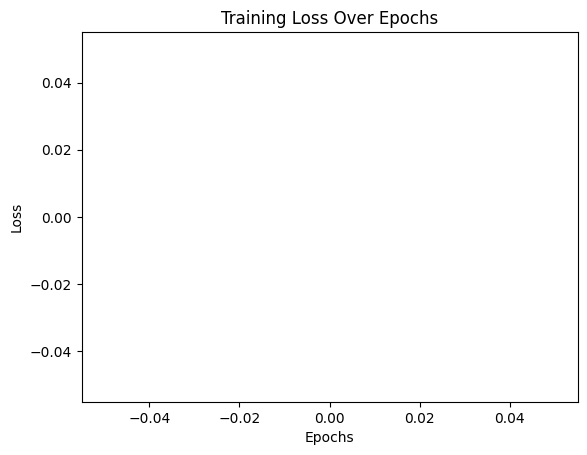

In [ ]:
layers = [
    Layer(input_size=X_train.shape[1], output_size=10, activation_function='relu'),
    Layer(input_size=10, output_size=4, activation_function='relu'),
    Layer(input_size=4, output_size=1, activation_function='relu'),
]

# Initialize the neural network
nn = NN(layers=layers, num_classes = 1, activation_function='relu', loss_function='mean_squared_error')

# Train the network
epochs = 10
batch_size = 1000
learning_rate = 0.001
nn.train(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    learning_rate=learning_rate, 
    verbose=True, 
    visualize=True
    )

In [ ]:
nn.evaluate(X_test, y_test)

{'loss': np.float64(nan),
 'accuracy': np.float64(1.0),
 'precision': np.float64(1.0),
 'recall': np.float64(1.0),
 'f1_score': np.float64(1.0)}

### Pytorch Implementation

### LLM Developed NN Implementation

### Comparison Across the Three Implemtations

## Congressional Voting Dataset

### Analytics, Visualization and Insights

You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
(43405, 66)
Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40',
       'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'A63', 'A64', 'class'],
      dtype='object')
   year        A1       A2       A3      A4       A5       A6        A7  \
0     1  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760   
1     1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340   
2     1  0.248660  0.69592  0.26

/var/folders/8v/nnkn44bx3k706fydnfr9z_xr0000gn/T/ipykernel_4883/1658581658.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)


class                                      0.000000
handicapped-infants                        1.834862
water-project-cost-sharing                12.844037
adoption-of-the-budget-resolution          3.669725
physician-fee-freeze                       2.752294
el-salvador-aid                            3.211009
religious-groups-in-schools                2.752294
anti-satellite-test-ban                    3.211009
aid-to-nicaraguan-contras                  5.504587
mx-missile                                 3.669725
immigration                                1.376147
synfuels-crporation-cutback                4.587156
education-spending                         8.256881
superfund-right-to-sue                     7.339450
crime                                      5.045872
duty-free-exports                          6.422018
export-administration-act-south-africa    24.770642
dtype: float64


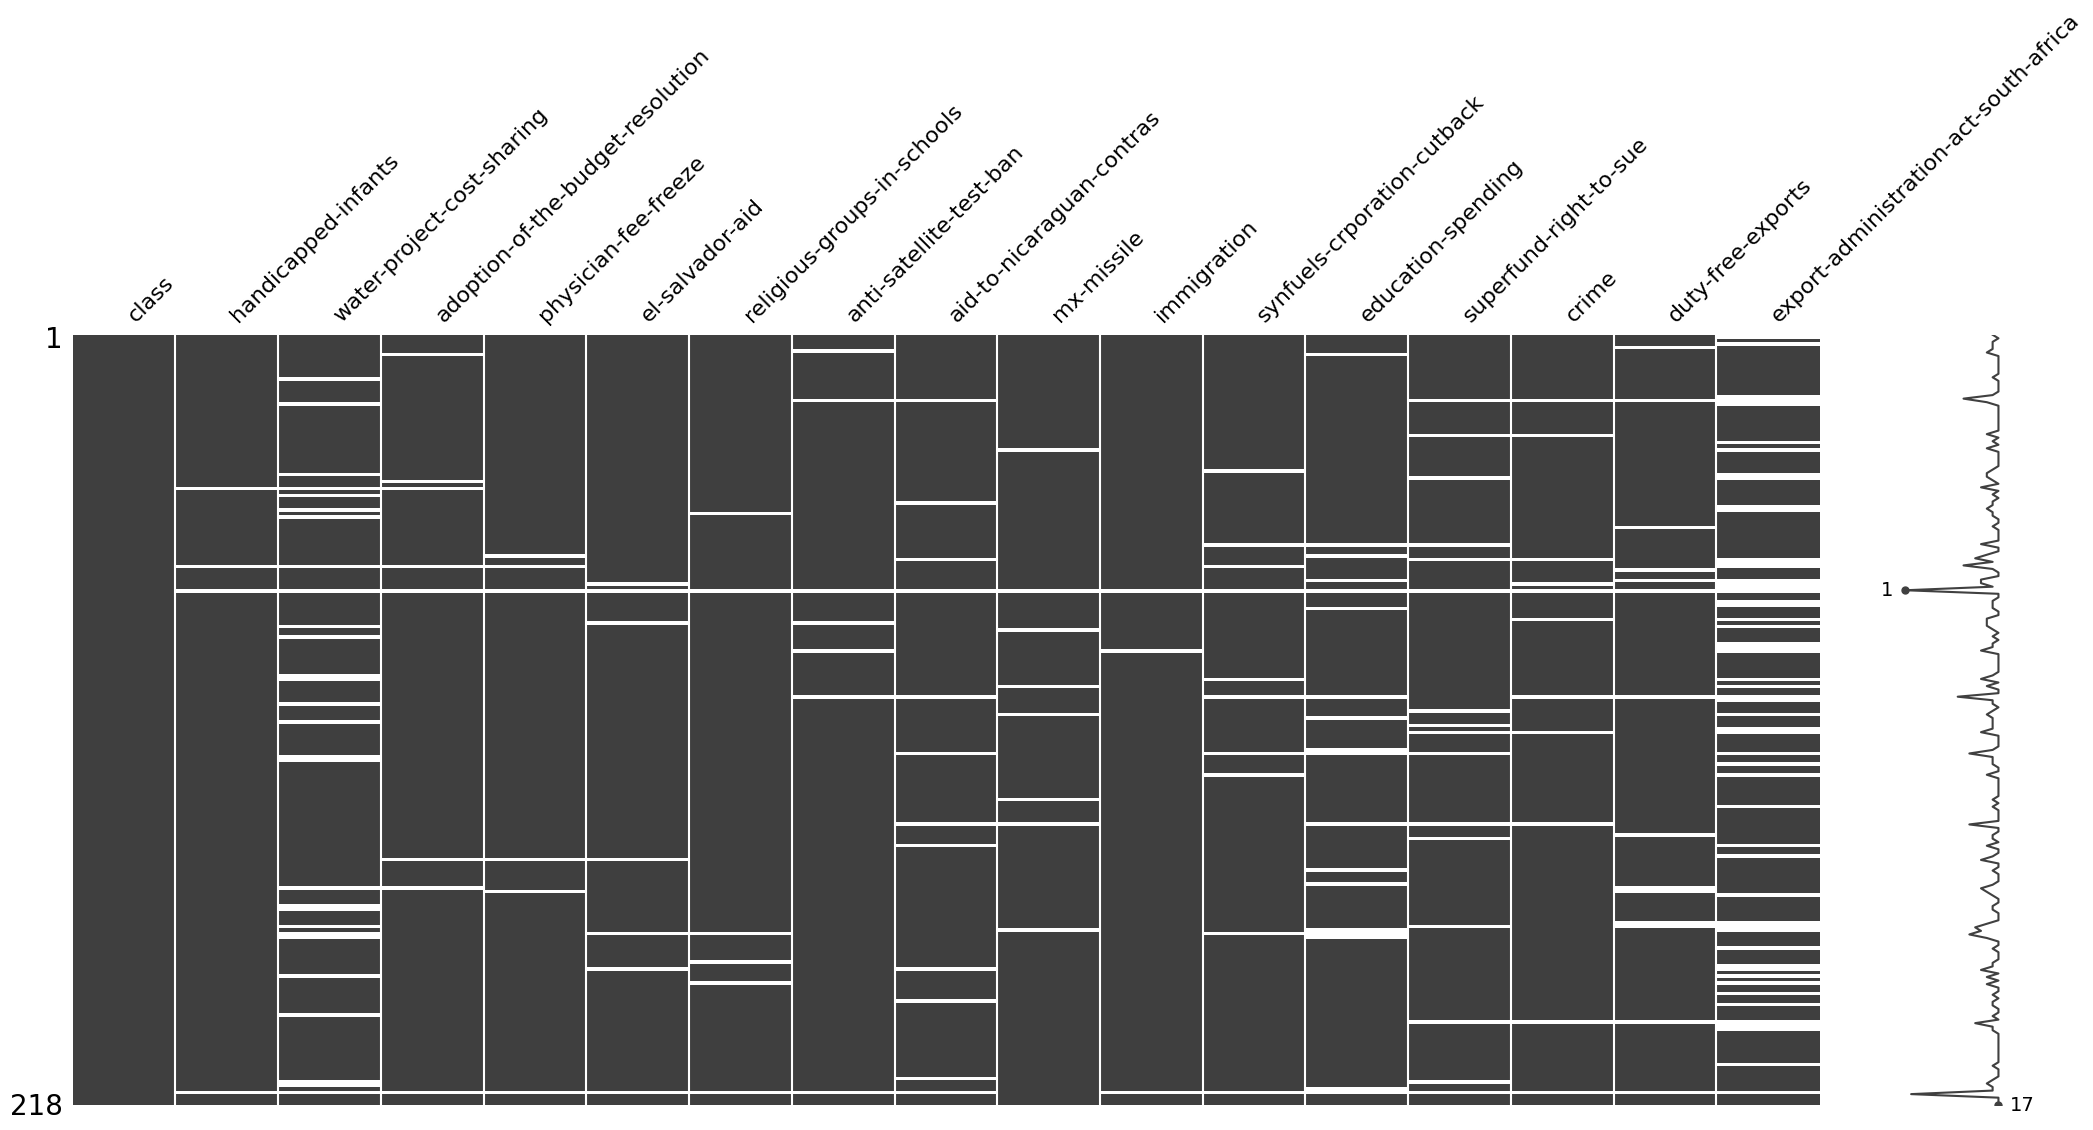

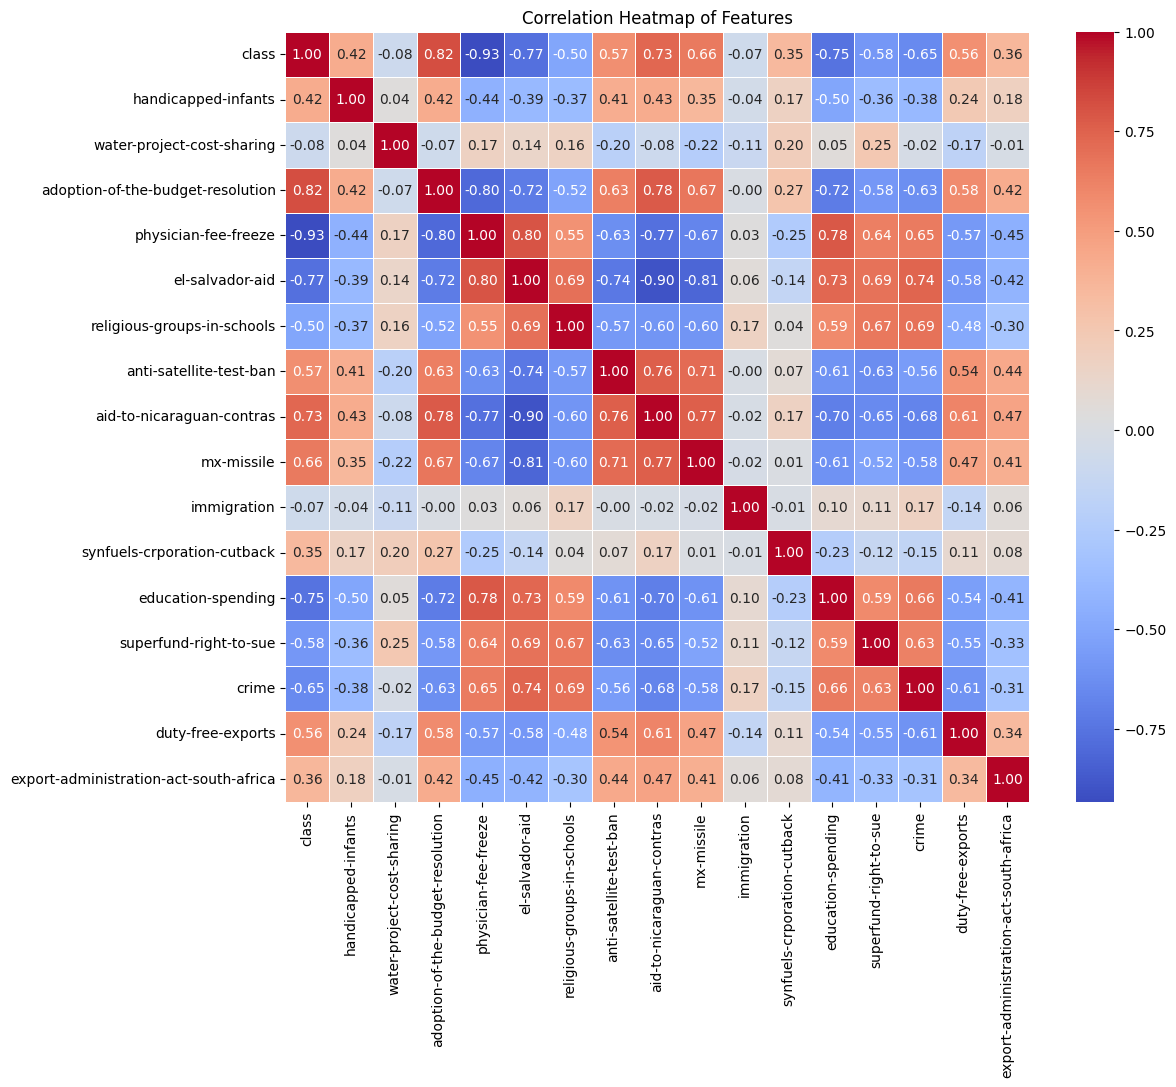

/var/folders/8v/nnkn44bx3k706fydnfr9z_xr0000gn/T/ipykernel_4883/713126722.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)


RuntimeError: Numpy is not available

RuntimeError: Numpy is not available

In [4]:
%run dataset_preprocessing.ipynb

### Custom NN Implementation

In [ ]:
# Convert tensors to numpy arrays and adjust shape
X_train = X_train_tensor.numpy().T   
y_train = y_train_tensor.numpy().reshape(1, -1)

X_val = X_val_tensor.numpy().T
y_val = y_val_tensor.numpy().reshape(1, -1)

In [ ]:
layers = [
    Layer(input_size=X_train.shape[1], output_size=10, activation_function='relu'),
    Layer(input_size=10, output_size=4, activation_function='relu'),
    Layer(input_size=4, output_size=1, activation_function='relu'),
]

# Initialize the neural network
nn = NN(layers=layers, num_classes = 1, activation_function='relu', loss_function='mean_squared_error')

# Train the network
epochs = 10
batch_size = 1000
learning_rate = 0.001
nn.train(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    learning_rate=learning_rate, 
    verbose=True, 
    visualize=True
    )

In [ ]:
nn.evaluate(X_val, y_val)

### Pytorch Implementation

In [5]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

In [6]:
# model class that inherites nn.Module
class Model(nn.Module):
    # input layer # hidden layer 1 (number of neurons)--> H2 (n) --> output
    def __init__(self, in_features=16, h1=8, h2=9, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [7]:
torch.manual_seed(123)
model = Model()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
# Train the model
epochs = 200
train_losses = []
val_accuracies = []

# Create progress bar
pbar = tqdm(range(epochs), desc="Training", unit="epoch", position=0, leave=True)

for epoch in pbar:
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.detach().numpy())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Update progress bar description
    pbar.set_postfix({'Loss': f"{loss.item():.4f}"})
    
    # Validation every 10 epochs
    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            y_eval = model(X_val_tensor)
            _, predicted = torch.max(y_eval, 1)
            correct = (predicted == y_val_tensor).sum().item()
            accuracy = correct/len(y_val_tensor)
            val_accuracies.append(accuracy)
        
        # Print validation info
        print(f'\nEpoch {epoch}/{epochs} | Loss: {loss.item():.4f} | Val Acc: {accuracy:.4f}')
        model.train()

# Final validation
model.eval()
with torch.no_grad():
    y_eval = model(X_val_tensor)
    _, predicted = torch.max(y_eval, 1)
    correct = (predicted == y_val_tensor).sum().item()
    final_accuracy = correct/len(y_val_tensor)
#print(f'\nFinal Validation Accuracy: {final_accuracy:.4f}')
print(f'\nFinal Validation Accuracy: {final_accuracy*100:.2f}%')

Training:  14%|█▍        | 28/200 [00:00<00:01, 139.26epoch/s, Loss=0.1854]


Epoch 0/200 | Loss: 0.6734 | Val Acc: 0.4773

Epoch 10/200 | Loss: 0.4842 | Val Acc: 0.9091

Epoch 20/200 | Loss: 0.2586 | Val Acc: 0.9773


Training:  21%|██        | 42/200 [00:00<00:01, 98.12epoch/s, Loss=0.0963] 


Epoch 30/200 | Loss: 0.1685 | Val Acc: 0.9773

Epoch 40/200 | Loss: 0.1043 | Val Acc: 1.0000


Training:  32%|███▏      | 64/200 [00:00<00:01, 95.43epoch/s, Loss=0.0180]


Epoch 50/200 | Loss: 0.0672 | Val Acc: 1.0000

Epoch 60/200 | Loss: 0.0413 | Val Acc: 1.0000

Epoch 70/200 | Loss: 0.0208 | Val Acc: 0.9773


Training:  52%|█████▏    | 103/200 [00:00<00:00, 118.30epoch/s, Loss=0.0026]


Epoch 80/200 | Loss: 0.0102 | Val Acc: 0.9773

Epoch 90/200 | Loss: 0.0056 | Val Acc: 0.9773

Epoch 100/200 | Loss: 0.0035 | Val Acc: 0.9773


Training:  66%|██████▌   | 131/200 [00:01<00:00, 126.64epoch/s, Loss=0.0014]


Epoch 110/200 | Loss: 0.0025 | Val Acc: 0.9773

Epoch 120/200 | Loss: 0.0019 | Val Acc: 0.9773

Epoch 130/200 | Loss: 0.0016 | Val Acc: 0.9773


Training:  79%|███████▉  | 158/200 [00:01<00:00, 128.25epoch/s, Loss=0.0009]


Epoch 140/200 | Loss: 0.0013 | Val Acc: 0.9773

Epoch 150/200 | Loss: 0.0011 | Val Acc: 0.9773

Epoch 160/200 | Loss: 0.0010 | Val Acc: 0.9773


Training:  93%|█████████▎| 186/200 [00:01<00:00, 124.79epoch/s, Loss=0.0007]


Epoch 170/200 | Loss: 0.0008 | Val Acc: 0.9773

Epoch 180/200 | Loss: 0.0007 | Val Acc: 0.9773

Epoch 190/200 | Loss: 0.0007 | Val Acc: 0.9773


Training: 100%|██████████| 200/200 [00:01<00:00, 113.04epoch/s, Loss=0.0006]



Final Validation Accuracy: 97.73%


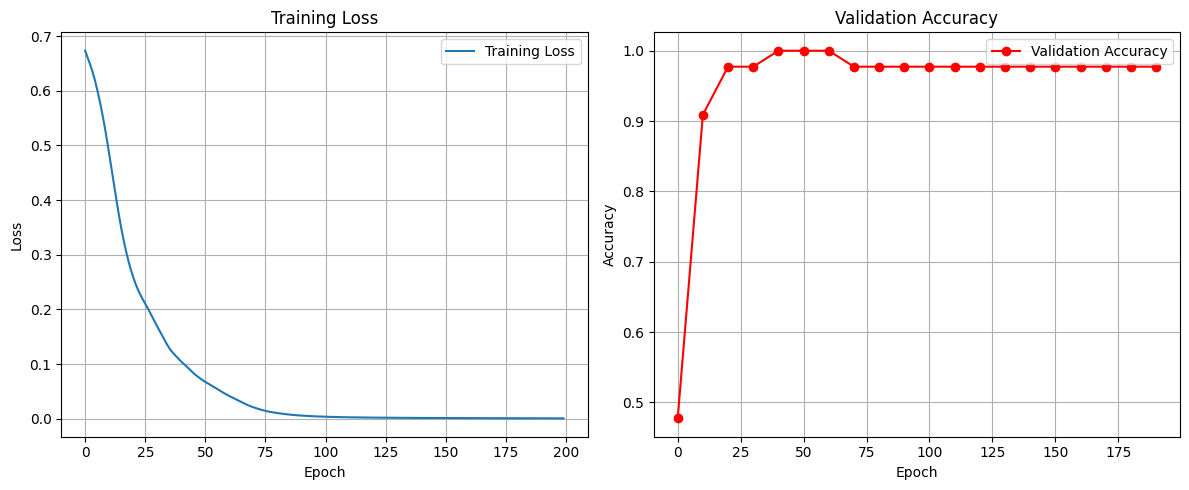

In [10]:
# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
val_epochs = list(range(0, epochs, 10))  # Create matching x-axis values
plt.plot(val_epochs, val_accuracies, 'r-o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### LLM Developed NN Implementation

In [11]:
# Convert tensors to numpy arrays and adjust shape
X_train = X_train_tensor.numpy().T   
y_train = y_train_tensor.numpy().reshape(1, -1)

X_val = X_val_tensor.numpy().T
y_val = y_val_tensor.numpy().reshape(1, -1)

import sys
sys.path.append('./nn_by_llm')

import nn

# Define network architecture
layer_dims = [X_train.shape[0], 10, 5, 1]
activations = ['relu', 'relu', 'sigmoid']

# Train
parameters = nn.train(X_train, y_train, layer_dims, activations, num_epochs=1000, learning_rate=0.01, print_loss=True)

# Predict
y_pred = nn.predict(X_val, parameters, activations)

# Compute accuracy
accuracy = np.mean(y_pred == y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6838
Epoch 200: Loss = 0.6781
Epoch 300: Loss = 0.6746
Epoch 400: Loss = 0.6725
Epoch 500: Loss = 0.6712
Epoch 600: Loss = 0.6704
Epoch 700: Loss = 0.6699
Epoch 800: Loss = 0.6696
Epoch 900: Loss = 0.6694
Validation Accuracy: 47.73%


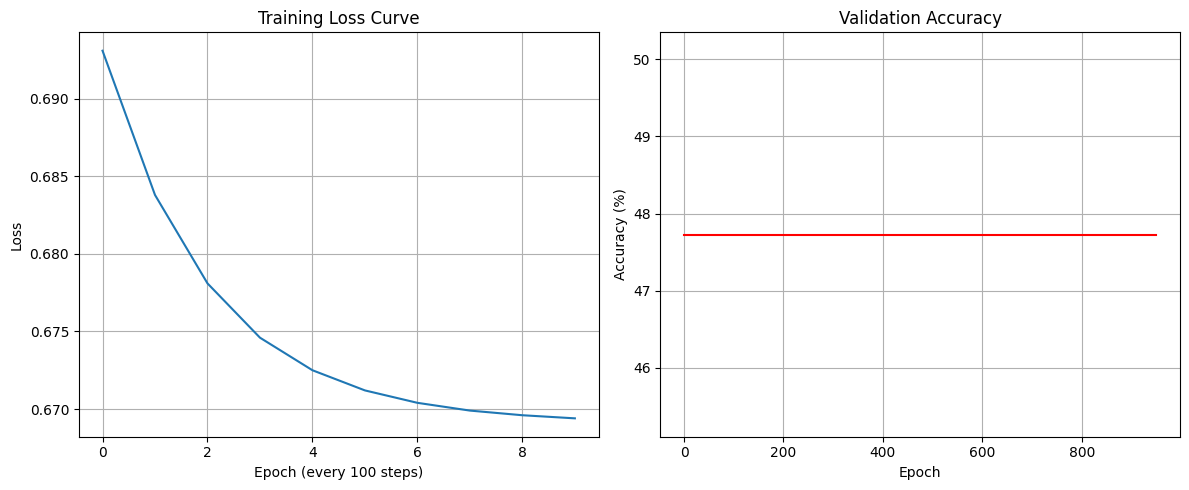

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Convert tensors to numpy arrays and adjust shape
X_train = X_train_tensor.numpy().T   
y_train = y_train_tensor.numpy().reshape(1, -1)
X_val = X_val_tensor.numpy().T
y_val = y_val_tensor.numpy().reshape(1, -1)

# Define network architecture
layer_dims = [X_train.shape[0], 10, 5, 1]
activations = ['relu', 'relu', 'sigmoid']

# Initialize lists to track metrics
loss_history = []
val_accuracy_history = []
eval_interval = 50  # Evaluate every 50 epochs

# We'll use this wrapper to capture loss values from print statements
class LossCapture:
    def __init__(self):
        self.losses = []
    
    def write(self, text):
        if "Loss = " in text:
            loss = float(text.split("Loss = ")[1].strip())
            self.losses.append(loss)

# Redirect print output to our capture class
loss_capture = LossCapture()
import sys
sys.stdout = loss_capture

# Train the model (this will populate loss_capture.losses via print statements)
parameters = nn.train(X_train, y_train, layer_dims, activations, 
                     num_epochs=1000, learning_rate=0.01, print_loss=True)

# Restore stdout
sys.stdout = sys.__stdout__

# Now calculate validation accuracies at intervals
for epoch in range(0, 1000, eval_interval):
    y_pred = nn.predict(X_val, parameters, activations)
    accuracy = np.mean(y_pred == y_val)
    val_accuracy_history.append((epoch, accuracy))
    print(f"Epoch {epoch}: Val Acc = {accuracy*100:.2f}%")

# Final evaluation
y_pred = nn.predict(X_val, parameters, activations)
final_accuracy = np.mean(y_pred == y_val)
print(f"\nFinal Validation Accuracy: {final_accuracy*100:.2f}%")

# Plotting
plt.figure(figsize=(12, 5))

# Loss curve (from captured print output)
plt.subplot(1, 2, 1)
plt.plot(loss_capture.losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch (every 100 steps)")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy curve
plt.subplot(1, 2, 2)
epochs, accuracies = zip(*val_accuracy_history)
plt.plot(epochs, [acc*100 for acc in accuracies], 'r-')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

The validation plot indicates potential issues with your model's learning process. The accuracy only improves from 46% to 50% over 800 epochs which is barely significant.  

### Existing NN implemention (sklearn-MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# No need to transpose if X and y are already in (samples, features) format
# Ensure your labels are 1D
y_train_np = y_train_tensor.numpy().ravel()
y_val_np = y_val_tensor.numpy().ravel()

# Create the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5),  # 2 hidden layers with 10 and 5 neurons
                    activation='relu',           
                    solver='adam',               
                    learning_rate_init=0.01,
                    max_iter=1000,
                    random_state=42)

# Train the model
mlp.fit(X_train_tensor.numpy(), y_train_np)

# Predict
y_pred = mlp.predict(X_val_tensor.numpy())

# Evaluate
accuracy = accuracy_score(y_val_np, y_pred)
print(f"Validation Accuracy (sklearn MLP): {accuracy * 100:.2f}%")



### Comparison Across the Three Implemtations